In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)


pd.set_option('display.max_columns', 150)

In [53]:
# 모델링 시간 구하기
from time import time

def check_time(t0):
    dur = (time() - t0)/60
    print ("계산에 걸린시간 : {:.2f} 분".format(dur))


In [7]:
raw_data = pd.read_csv('Data_set.csv',encoding='cp949')
print ("Data Shape : {}".format(raw_data.shape))
raw_data.head()

Data Shape : (100233, 69)


,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE,STRT_CRDT_GRAD,LTST_CRDT_GRAD,PREM_OVDU_RATE,LT1Y_PEOD_RATE,AVG_STLN_RATE,STLN_REMN_AMT,LT1Y_STLN_AMT,LT1Y_SLOD_RATE,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,AVG_CALL_TIME,AVG_CALL_FREQ,TEL_MBSP_GRAD,ARPU,MON_TLFE_AMT,CBPT_MBSP_YN,MOBL_FATY_PRC,TEL_CNTT_QTR,NUM_DAY_SUSP,CRMM_OVDU_AMT,TLFE_UNPD_CNT,LT1Y_MXOD_AMT,PAYM_METD,LINE_STUS,MOBL_PRIN
0,1,0,1,0,0,0,9001,9001,9001,0,1,0,2,13,3,420001,공무원,5400,7700,4,1,24.0,주부,0,0,0,0,0,0,0,0,0,0,12,20미만,0,0,0,0,190000,0,190000,0,190000,20000000,20000000,0,0,10,0,0,0,50,1,450,493,NaN,30000,80000,N,800000,20111,0,0,0,0,O,U,580000
1,2,0,1,0,0,0,24001,0,24001,0,0,0,2,121,0,0,자영업,5500,8100,4,2,29.0,주부,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,110000,0,0,7000000,36000000,0,0,0,300000,2,5,50,1,81,22,NaN,30000,40000,N,500000,20143,0,0,0,0,O,U,90000
2,3,0,0,1,3,2,15001,9001,0,3001,1,25,4,121,0,0,주부,0,4900,4,1,34.0,2차산업 종사자,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,100000,11000000,11000000,0,0,0,0,0,2,60,2,139,17,NaN,30000,40000,Y,500000,20103,0,0,0,0,O,U,120000
3,4,1,0,2,4,2,6001,3001,0,3001,1,25,4,61,0,0,학생,0,10100,2,1,0.0,NaN,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4000000,4000000,0,0,0,0,0,1,35,1,1118,0,NaN,30000,80000,N,900000,20144,0,540000,0,630000,G,S,320000
4,5,0,4,0,0,0,21001,15001,21001,0,1,0,1,97,0,0,공무원,4800,4800,4,1,14.0,주부,0,0,0,0,0,0,0,0,0,0,0,0,95,2000000,0,0,0,0,0,0,300000,4000000,4000000,0,0,0,500000,2,1,45,1,396,354,W,50000,80000,Y,800000,20131,0,130000,0,90000,G,U,410000


In [8]:
copy_data = raw_data[:]

# 1. 전처리


## 1) Nan값 처리


In [9]:
# OCCP_NAME_G
check_data = raw_data[['OCCP_NAME_G', 'CUST_JOB_INCM',\
                       'CRLN_OVDU_RATE', 'AGE']]
check_data['OCCP_NAME_G'].fillna('비식별', inplace=True)
check_data['OCCP_NAME_G'].replace({'*':'비식별'}, inplace=True)
copy_data['OCCP_NAME_G'] = check_data['OCCP_NAME_G']

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
# LAST_CHLD_AGE
copy_data['LAST_CHLD_AGE'].fillna(0, inplace=True)

In [11]:
#  MATE_OCCP_NAME_G

check_data = copy_data[['MATE_OCCP_NAME_G', 'MATE_JOB_INCM',\
                        'ACTL_FMLY_NUM','AGE']]
check_data['MATE_OCCP_NAME_G'].fillna('미혼', inplace=True)
check_data['MATE_OCCP_NAME_G'].replace({'*':'비식별'}, inplace=True)

copy_data['MATE_OCCP_NAME_G'] = check_data['MATE_OCCP_NAME_G']

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
# TEL_MBSP_GRAD
copy_data['TEL_MBSP_GRAD'].fillna('N', inplace=True)

In [13]:
# PAYM_METD
copy_data['PAYM_METD'].fillna('N', inplace=True)

In [14]:
# Age

# *을 제외한 나이의 평균인 46으로 채움
copy_data['AGE'].replace({'*':46}, inplace=True) 

In [15]:
# Sex
check_data = copy_data[['SEX', 'OCCP_NAME_G', 'MATE_OCCP_NAME_G',\
                        'CUST_JOB_INCM']]

check_list1 = check_data['SEX'].tolist()
check_list2 = check_data['CUST_JOB_INCM'].tolist()
check_list3 = check_data['MATE_OCCP_NAME_G'].tolist()

for i, val in enumerate(check_list1): # 인덱스와 값을 가져옴
    if val == '*':
        if check_list2[i]>3600:
            check_list1[i] = '1'
        elif check_list3[i] =='주부':
            check_list1[i] = '1'
        else:
            check_list1[i] = '2'
            
        
check_data['SEX'] = check_list1
copy_data['SEX'] = check_data['SEX']

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 2) Category 변수 처리

In [16]:
cur = 24214

# MIN_CNTT_DATE
check_data = copy_data [['MIN_CNTT_DATE', 'CTCD_OCCR_MDIF', \
                         'CRDT_OCCR_MDIF','SPTCT_OCCR_MDIF' ]]

check_data['MIN_CNTT_DATE']=pd.DataFrame(((check_data['MIN_CNTT_DATE'\
                                                     ].values/100).astype(int)) * 12 + \
                                         (check_data['MIN_CNTT_DATE'].values%100))
check_data_list = check_data['MIN_CNTT_DATE'].tolist()

for i,val in enumerate(check_data_list):
    if val != 0:
        check_data_list[i] = cur-val
        
check_data.loc[:,'MIN_CNTT_DATE']= pd.DataFrame(check_data_list)

copy_data['MIN_CNTT_DATE_duration'] = check_data['MIN_CNTT_DATE']

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [17]:
# TEL_CNTT_QTR

check_data = pd.DataFrame(copy_data['TEL_CNTT_QTR'])

#데이터의 연월을 변환
check_data['TEL_CNTT_QTR']=pd.DataFrame(((check_data[\
                                                     'TEL_CNTT_QTR'].values/10).astype(int)) \
                                        * 12 + ((check_data['TEL_CNTT_QTR'].values%10)*3))

check_data_list = check_data['TEL_CNTT_QTR'].tolist()
for i,val in enumerate(check_data_list):
    if val != 0:
        check_data_list[i] = cur-val
        
check_data.loc[:,'TEL_CNTT_QTR']= pd.DataFrame(check_data_list)
copy_data['TEL_CNTT_QTR_duration'] = check_data['TEL_CNTT_QTR']

In [18]:
#  LT1Y_PEOD_RATE
check_data = copy_data['LT1Y_PEOD_RATE'].tolist()

for i, val in enumerate(check_data):
    if val != 0:
        check_data[i] = int(check_data[i][:2])
temp = pd.DataFrame(check_data) 
temp.rename(columns={0:'LT1Y_PEOD_RATE'}, inplace=True)

copy_data['LT1Y_PEOD_RATE'] = temp


## 3) 단위 통일

In [19]:
#천원 -> 원
loan_feature_1 = ['TOT_LNIF_AMT','TOT_CLIF_AMT','BNK_LNIF_AMT',\
                  'CPT_LNIF_AMT', 'CB_GUIF_AMT']
check_data = copy_data[loan_feature_1]
loan_feature_1_unit = ["unit_{}".format(i) for i in loan_feature_1 ] 


for i,j in zip(loan_feature_1, loan_feature_1_unit):
    #check_data = check_data.assign(j = lambda x: (x[i])*1000)
    if check_data[i].bool != False:
        newcol = (check_data[i])*1000
        check_data[j] = newcol
    
    
#로그변환

loan_feature_1_unit_log = ["log_{}".format(i) for i in loan_feature_1_unit ] 

# 기존의 데이터에 log 를 취한 column생성


    
for i in loan_feature_1_unit:
    v = 'log_'+i
    check_data[v] = np.log(check_data[i]+1)
    
    
#로그변환 취한 데이터를 copy_data에 적용
copy_data[loan_feature_1_unit_log] = check_data[loan_feature_1_unit_log]


#단위 변경 데이터를 적용한다
copy_data[loan_feature_1] = check_data[loan_feature_1_unit]

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
# 만원 -> 원

loan_feature_2 = ['CUST_JOB_INCM', 'HSHD_INFR_INCM','MATE_JOB_INCM']
check_data = copy_data[loan_feature_2]
loan_feature_2_unit = ["unit_{}".format(i) for i in loan_feature_2 ] 


for i,j in zip(loan_feature_2, loan_feature_2_unit):
    check_data[j]= list(map(lambda x: x*10000 , check_data[i]))

#로그변환

loan_feature_2_unit_log = ["log_{}".format(i) for i in loan_feature_2_unit ] 

# 기존의 데이터에 log 를 취한 column생성


    
for i in loan_feature_2_unit:
    v = 'log_'+i
    check_data[v] = np.log(check_data[i]+1)
    
#로그변환 취한 데이터를 copy_data에 적용
copy_data[loan_feature_2_unit_log] = check_data[loan_feature_2_unit_log]
copy_data[loan_feature_2] = check_data[loan_feature_2_unit]

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 4) 변수에 로그변환 하기

In [21]:
raw_feature = ['MOBL_PRIN', 'STLN_REMN_AMT','GDINS_MON_PREM', \
               'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM','FMLY_SVINS_MNPREM',\
               'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM',\
                'MON_TLFE_AMT','CRMM_OVDU_AMT',\
               'LT1Y_MXOD_AMT']

check_data = copy_data[raw_feature]


raw_feature_log = ["log_{}".format(i) for i in raw_feature]


for i in raw_feature:
    v = 'log_'+i
    check_data[v] = np.log(check_data[i]+1)

copy_data['ARPU_log'] = np.log(copy_data['ARPU']+2)


copy_data[raw_feature_log] = check_data[raw_feature_log]

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [22]:
#count 변수

import math 

copy_data['trans_CRDT_CARD_CNT'] = list(map(lambda x : \
                                            math.sqrt(x), \
                                            copy_data['CRDT_CARD_CNT']))


## 5) 카테고리 함수 변환


In [23]:
# OCCP_NAME_G

cat_feature = ['OCCP_NAME_G', 'MATE_OCCP_NAME_G', 'SEX',\
               'TEL_MBSP_GRAD', 'CBPT_MBSP_YN', 'PAYM_METD',\
                'LINE_STUS']
check_data = raw_data[cat_feature]

check_data['OCCP_NAME_G'] = list(map(lambda x: x.replace(" ",""), check_data['OCCP_NAME_G']))

#표기의 간편성을 위해 변수 이름을 바꾼다

check_data['OCCP_NAME_G'].replace({'2차산업종사자': '2차산업', \
                                  '3차산업종사자': '3차산업',\
                                  '단순사무직': '사무보조',\
                                  '고소득전문직':'전문직',\
                                  '1차산업종사자':'1차산업',\
                                  '기업/단체임원':'임원',\
                                  '예체능계종사자':'예술',\
                                  '단순노무직':'노무직'}, inplace=True)

#get_dummies적용

copy_data =pd.concat([copy_data, pd.get_dummies(check_data['OCCP_NAME_G'], prefix='직업')], axis=1)

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
# MATE_OCCP_NAME_G

check_data['MATE_OCCP_NAME_G'] = list(map(lambda x: x.replace(" ",""), check_data['MATE_OCCP_NAME_G']))
check_data['MATE_OCCP_NAME_G'].replace({'2차산업종사자':'2차산업',\
                                       '3차산업종사자':'3차산업',\
                                       '1차산업종사자':'1차산업',\
                                       '단순사무직':'사무보조',\
                                       '기업/단체임원':'임원',\
                                       '고소득전문직':'전문직',\
                                       '단순노무직':'노무직',\
                                       '예체능계종사자':'예술'},inplace=True)

copy_data = pd.concat([copy_data,pd.get_dummies(check_data['MATE_OCCP_NAME_G'], prefix='배우자')], axis=1)

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
# SEX
temp = pd.get_dummies(check_data['SEX'], prefix="성별")
copy_data = pd.concat([copy_data, temp], axis=1)

In [26]:
# 통신관련 변수

phone_feature = [ 'TEL_MBSP_GRAD','CBPT_MBSP_YN',\
                 'PAYM_METD','LINE_STUS']

temp = pd.get_dummies(check_data[phone_feature], prefix=['SKT등급','결합상품','납부',\
                                                         '회선상태'])
copy_data = pd.concat([copy_data, temp], axis=1)

In [27]:
# 더미화 후 카테고리 변수 삭제

del_feature = ['OCCP_NAME_G', 'MATE_OCCP_NAME_G', \
               'TEL_MBSP_GRAD', 'CBPT_MBSP_YN', 'TEL_CNTT_QTR', \
               'LINE_STUS','PAYM_METD']

copy_data.drop(del_feature, axis=1, inplace=True)

# 2. 변수 생성

In [28]:
# 두 변수의 비율로 새로운 변수를 생성하는 함수

def make_var(feature1, feature2, var_name):# 1:분모 / 2:분자
    temp=[feature1, feature2]
    check_data = copy_data[temp]+1 # 0인 값이 많기 때문에 1을 더한다
    copy_data[var_name] = check_data[feature2]/check_data[feature1]
    

In [29]:
# 담보대출 비율
make_var('TOT_LNIF_AMT', 'CB_GUIF_AMT', 'housing_prop')

In [30]:
# 소득대비 대출 금액
make_var('HSHD_INFR_INCM', 'TOT_LNIF_AMT', 'loan_ver_earn')

In [31]:
# 은행권 대출 비율
make_var('TOT_LNIF_AMT', 'BNK_LNIF_AMT', 'bank_loan_prop')

In [32]:
# 은행권 내의 본인 등급
make_var('CUST_JOB_INCM', 'BNK_LNIF_AMT', 'bank_grade')

In [33]:
# 보험 유지 비율
make_var('FMLY_PLPY_CNT','CNTT_LAMT_CNT', 'complete_ins')

In [34]:
# 위헙 대출 비중
make_var('TOT_LNIF_AMT', 'CPT_LNIF_AMT', 'danger_loan')

In [35]:
# 가구 재 보험가입 비중
make_var('ACTL_FMLY_NUM','CUST_FMLY_NUM','insur_fam_prop')


In [36]:
# 통신요금 정지 비중
copy_data['TEL_CNTT_QTR_duration_day']=copy_data['TEL_CNTT_QTR_duration']*30
make_var('TEL_CNTT_QTR_duration_day', 'NUM_DAY_SUSP', 'SKT_stop_prop')
copy_data.drop('TEL_CNTT_QTR_duration_day',axis=1, inplace=True)

In [37]:
# 은행권 대출 개수 대비 기타 대출 비중
bad_loan=['CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT']


copy_data['bad_loan'] = copy_data[bad_loan[0]]+ copy_data[bad_loan[1]]+copy_data[bad_loan[2]]
make_var('BNK_LNIF_CNT', 'bad_loan', 'bad_loan_prop')
copy_data.drop('bad_loan', axis=1, inplace=True)


In [38]:
# 월소득 대비 통신비, 보험료
cost_prop = ['FMLY_GDINS_MNPREM','FMLY_SVINS_MNPREM','MON_TLFE_AMT', 'HSHD_INFR_INCM']

check_data =  copy_data[cost_prop]
check_list = check_data['HSHD_INFR_INCM'].tolist()
check_mean = check_data['HSHD_INFR_INCM'].mean()
for i,val in enumerate(check_list): # 추정소득이 없는 가정은 평균값으로 임시 계산함
    if val == 0:
        check_list[i] = check_mean

check_data['HSHD_INFR_INCM'] = check_list

check_data['cost_prop'] =(check_data[cost_prop[0]]+check_data[cost_prop[1]]+ check_data[cost_prop[2]])/(check_data[cost_prop[3]]+1)

copy_data['cost_prop'] = check_data['cost_prop']

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [39]:
# 자녀의 유무
child =[]
for i in np.array(copy_data['LAST_CHLD_AGE']):
    if i == 0:
        child.append(0)
    else:
        child.append(1)
        
copy_data['have_child'] = child

copy_data.drop('LAST_CHLD_AGE', axis=1, inplace=True)

In [40]:
# 소득대비 신용대출의 비중
make_var('HSHD_INFR_INCM', 'TOT_CLIF_AMT', 'credit_prop')

In [41]:
# 한화 생명 신용대출 연체
check_data = raw_data[['TOT_CRLN_AMT','TOT_REPY_AMT','CRLN_OVDU_RATE']]


check_data_list = check_data['CRLN_OVDU_RATE'].tolist()

for i, val in enumerate(check_data_list):
    if val != 0 :
        check_data_list[i] = 1

        
check_data['CRLN_OVDU_RATE'] = pd.DataFrame(check_data_list)

copy_data['CRLN_OVDU_RATE'] = check_data['CRLN_OVDU_RATE']


/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [42]:
# 연체 상환 점수 변수
check_data = copy_data[['LT1Y_CLOD_RATE','CRLN_30OVDU_RATE']]

check_data_list = np.array(check_data)

check_result = []

for i in range(len(check_data_list)):
    if check_data_list[i][0] != 0 and check_data_list[i][1] != 0:
        check_result.append(1)
    else:
        check_result.append(0)
    
copy_data['credit_long_overdue'] = pd.DataFrame(check_result)
copy_data.drop(['LT1Y_CLOD_RATE','CRLN_30OVDU_RATE'], axis=1, inplace=True)

In [43]:
# 값을 구간별로 나누는 함수
def make_section(feature1):
    check_data_list = copy_data[feature1].tolist()
    for i, val in enumerate(check_data_list):
        if val == 0:
            check_data_list[i] = 0
        elif int(val/10) ==0:
            check_data_list[i] = 1
        else: 
            check_data_list[i] = int(val/10)
            
    return check_data_list        
            

In [44]:
# PREM_OVDU_RATE

check_data =np.log(copy_data['PREM_OVDU_RATE']+1)


check_data_list = make_section('PREM_OVDU_RATE')
copy_data['PREM_OVDU_RATE_section'] = pd.DataFrame(check_data_list)

In [45]:

#AVG_STLN_RATE
check_data_list = make_section('AVG_STLN_RATE')

copy_data['AVG_STLN_RATE_section'] = pd.DataFrame(check_data_list)



In [46]:
copy_data.shape

(100233, 147)

In [47]:
raw_data = copy_data[:]

# 3. 오버샘플링

In [48]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from collections import Counter # counter 함수
from sklearn.preprocessing import MinMaxScaler # 스케일링
from functools import reduce # reduce 함수 사용

from tqdm import tqdm_notebook

import pickle

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# 모델링 import
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb 
from lightgbm import LGBMClassifier # Classification model

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report # classification report


# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV # 그리드서치



/Users/sherryjeon/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
# 전체 데이터, 상환, 부실 데이터 개수 및 비율 확인 함수

def check_prop ( checking_data):
    label_1 = len(checking_data.loc[checking_data['TARGET'] == 1])
    label_0 = len(checking_data.loc[checking_data['TARGET'] == 0])
    label_prop = label_1 / (label_1 + label_0)

    print (" 1) 전체 데이터 개수 : {} \n 2) 상환 개수 : {} \n 3) 부실 개수: {} \n 4) 부실데이터 비율: {:.2f} ".\
           format( label_1+label_0, label_0, label_1, label_prop))


In [50]:
check_prop(raw_data)

# CUST_ID 삭제 (index와 값이 같음), X와 y 나눔
X = raw_data.drop(['CUST_ID', 'TARGET'], axis=1)
y = raw_data['TARGET']


 1) 전체 데이터 개수 : 100233 
 2) 상환 개수 : 95946 
 3) 부실 개수: 4287 
 4) 부실데이터 비율: 0.04 


## 1) 스케일링

In [51]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## 2) border SMOTE

In [54]:
t0 = time()
X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(X_scaled,y)
check_time(t0)
y_resampled = pd.DataFrame(y_resampled).rename(columns={0:'TARGET'})
# y값의 변수 이름 변환

X_resampled = pd.DataFrame(X_resampled)

temp = pd.concat([y_resampled, X_resampled], axis=1) 
# 비율을 확인하기 위해 잠시 합함

check_prop(temp)
X_resampled.columns = X.columns

계산에 걸린시간 : 2.55 분
 1) 전체 데이터 개수 : 191892 
 2) 상환 개수 : 95946 
 3) 부실 개수: 95946 
 4) 부실데이터 비율: 0.50 


## 3) Clustering

In [56]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_resampled)

prediction = kmeans.predict(X_resampled)
prediction = pd.DataFrame(prediction)
prediction.rename(columns={0:'CLUSTER'}, inplace=True)
                  
X_resampled_cluster = X_resampled.values
print ("데이터 타입은 : {}".format(X_resampled_cluster.dtype))

cluster_4 = pd.concat([prediction, pd.DataFrame(X_resampled_cluster)], axis=1)
                  
cluster_4.head()                  

데이터 타입은 : float64


,CLUSTER,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
0,0,0.2,0.0,0.000000,0.000000,0.009054,0.009055,0.009535,0.00000,0.008264,0.000000,0.181818,0.107438,0.3,0.428572,0.54,0.385,0.428571,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.222222,0.00,0.000000,0.0,0.0,0.0475,0.0,0.0475,0.0,0.019,0.020,0.020,0.0,0.0,0.163934,0.000000,0.000000,0.000000,0.6,0.0,0.0450,0.259474,0.060002,0.084211,0.666667,0.0,0.000000,0.0,0.00000,0.527273,0.0,0.233333,0.659311,0.772923,0.774854,0.000000,0.959074,0.966549,0.950062,0.0,0.785607,0.953990,0.000000,0.799562,0.0,0.799562,0.0,0.754108,0.811226,0.811226,0.820228,0.000000,0.000000,0.426401,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.868850e-05,1.175966e-10,1.000000e+00,1.765731e-10,0.120219,1.100927e-07,0.228571,0.000379,0.021053,0.005571,1.0,1.176016e-10,0.0,0.1,0.0
1,0,0.2,0.0,0.000000,0.000000,0.024145,0.000000,0.025425,0.00000,0.000000,0.000000,0.181818,1.000000,0.0,0.000000,0.55,0.405,0.428571,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13,0.000000,0.00,0.000000,0.0,0.0,0.0000,0.0,0.0275,0.0,0.000,0.007,0.036,0.0,0.0,0.000000,0.001000,0.011696,0.227273,0.6,0.0,0.0081,0.011579,0.060002,0.042105,0.416667,0.0,0.000000,0.0,0.00000,0.081818,0.0,0.077778,0.730337,0.000000,0.822312,0.000000,0.000000,0.967545,0.952711,0.0,0.785607,0.820050,0.000000,0.000000,0.0,0.763610,0.0,0.000000,0.760566,0.839589,0.769870,0.000000,0.000000,0.426401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.985220e-14,2.980919e-10,1.000000e+00,4.622684e-10,0.015483,4.065889e-08,0.485714,0.000972,0.021053,0.002942,1.0,7.390012e-18,0.0,0.1,0.0
2,3,0.0,0.2,0.428571,0.333333,0.015091,0.009055,0.000000,0.00997,0.008264,0.206612,0.363636,1.000000,0.0,0.000000,0.00,0.245,0.428571,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.000000,0.00,0.000000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.010,0.011,0.011,0.0,0.0,0.000000,0.000000,0.000000,0.090909,0.8,1.0,0.0139,0.008947,0.060002,0.042105,0.416667,0.0,0.000000,0.0,0.00000,0.109091,0.0,0.255556,0.696301,0.772923,0.000000,0.763958,0.000000,0.000000,0.926415,0.0,0.785607,0.840731,0.000000,0.000000,0.0,0.000000,0.0,0.714286,0.782377,0.782377,0.769870,0.000000,0.000000,0.603023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.664962e-14,3.079855e-10,6.565618e-08,1.059321e-09,0.036430,2.000534e-01,0.228571,0.000342,0.431579,0.001297,1.0,1.848025e-10,0.0,0.1,0.0
3,2,0.0,0.4,0.571429,0.333333,0.006036,0.003019,0.000000,0.00997,0.008264,0.206612,0.363636,0.504132,0.0,0.000000,0.00,0.505,0.142857,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.00,0.000000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.000,0.004,0.004,0.0,0.0,0.000000,0.000000,0.000000,0.045455,0.3,0.0,0.1118,0.000000,0.060002,0.084211,0.750000,0.0,0.450000,0.0,0.39375,0.290909,0.0,0.066667,0.629952,0.719905,0.000000,0.763958,0.000000,0.000000,0.964256,0.0,0.785607,0.911239,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.733562,0.733562,0.820228,0.942955,0.934756,0.603023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.438209e-13,5.976940e-11,1.6563

In [57]:
# 각 클러스터 별로 클래스 비율 확인

cluster_4 = pd.concat([y_resampled, cluster_4],axis=1)

# 클러스터값이 같은 데이터끼리 하나로 묶음

columns_val_name = ["cluster_4_{}".format (i) for i in range(0, 5) ]
columns_list = []

for i in range(0, 5):
    columns_list.append(pd.DataFrame(cluster_4.loc[cluster_4.CLUSTER == i]))

    
# 각 클러스터 별로 데이터의 비율을 확인

for i in range(0,4):
    print (columns_val_name[i])
    check_prop(pd.DataFrame(columns_list[i]))

cluster_4_0
 1) 전체 데이터 개수 : 40361 
 2) 상환 개수 : 23431 
 3) 부실 개수: 16930 
 4) 부실데이터 비율: 0.42 
cluster_4_1
 1) 전체 데이터 개수 : 56188 
 2) 상환 개수 : 25045 
 3) 부실 개수: 31143 
 4) 부실데이터 비율: 0.55 
cluster_4_2
 1) 전체 데이터 개수 : 45466 
 2) 상환 개수 : 20197 
 3) 부실 개수: 25269 
 4) 부실데이터 비율: 0.56 
cluster_4_3
 1) 전체 데이터 개수 : 49877 
 2) 상환 개수 : 27273 
 3) 부실 개수: 22604 
 4) 부실데이터 비율: 0.45 


# 4. 모델링

### LightGBM

In [58]:
# light gbm 그리드 서치 적용 함수

def lightgbm(X, y, hyper_dict):
    grid_search = GridSearchCV(LGBMClassifier(),\
                               hyper_dict, cv=3, scoring='f1')
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
    grid_search.fit(X_train, y_train)
    
    return grid_search, X_val, y_val

In [59]:
#그리드 서치 적용 전


def lightgbm_once(X, y, application, boosting, learning_rate, metric, n_estimators ):
    lightmodel = LGBMClassifier(application=application, boosting=boosting,\
                                learning_rate=learning_rate, metric=metric,\
                                n_estimators=n_estimators)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
    
    lightmodel.fit(X_train, y_train)
    y_pred = lightmodel.predict(X_val)
    
    #score
    test_score_once("LightGBM", lightmodel, X, y, y_val, y_pred)
    
    return lightmodel

### Random Foreset

In [60]:
# 그리드 서치 적용 안한 함수 


def random_forest_once(X, y,n_estimators):


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    forest = RandomForestClassifier (n_estimators=n_estimators, random_state=2,\
                                     max_features='log2', n_jobs = -1)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

    
    test_score_once("Random Forest", forest, X, y, y_test, y_pred)
    
    return forest

### Score

In [61]:
# 그리드 서치 적용 스코어 함수
def test_score (model_name, model_object, X_test, y_test):
    y_pred = model_object.predict(X_test)
    model_object.score(X_test, y_test)
    
    print ("모델 : {}". format(model_name))
    print ("최적 매개변수 : {}". format(model_object.best_params_))
    print ("교차검증 결과 분석")
    print (pd.DataFrame(model_object.cv_results_).head())
    print ()
    #print ("점수 : {:.3f}".format(model_object.scorer_))
    print ("최상 교차 점수 : {:.3f}". format(model_object.best_score_))
    print ("분류 리포트 \n")
    print(classification_report(y_test, y_pred))

In [62]:
# 그리드 서치 적용 안한 함수



def test_score_once(model_name, model_object,X, y, y_test, y_pred ):
    print (model_name)
    #score
    print ("Classification Report")
    print(classification_report(y_test, y_pred))

    # 크로스 밸리데이션 
    kfold = KFold(n_splits=5, shuffle = True)
    score = cross_val_score(model_object, X, y, cv=kfold, scoring = 'f1')
    
    mean_score = reduce((lambda x, y: x+y), score)/5
    print ("F1 Score list: {}\n Mean F1 Score: {}". format(score, mean_score))
    
    print ("------------------")
    print ("Accuracy")
    X_train, X_test, y_train_temp, y_test_temp = train_test_split(X, y, random_state=0)
    y_pred_temp = model_object.predict(X_test)

    print ("훈련세트 정확도: {:.3f}". format(model_object.score(X_train, y_train_temp)))
    print ("테스트 세트 정확도: {:.3f}".format(model_object.score(X_test, y_test_temp)))

In [63]:
X_0 = columns_list[0].drop(['TARGET', 'CLUSTER'], axis=1) # 첫번째 클러스터의 X, y 를 나눔
y_0 = columns_list[0]['TARGET']
X_1 = columns_list[1].drop(['TARGET', 'CLUSTER'], axis=1) # 첫번째 클러스터의 X, y 를 나눔
y_1 = columns_list[1]['TARGET']
X_2 = columns_list[2].drop(['TARGET', 'CLUSTER'], axis=1) # 첫번째 클러스터의 X, y 를 나눔
y_2 = columns_list[2]['TARGET']
X_3 = columns_list[3].drop(['TARGET', 'CLUSTER'], axis=1) # 첫번째 클러스터의 X, y 를 나눔
y_3 = columns_list[3]['TARGET']

## 클러스터별 모델 적용

In [142]:
param_grid = [{'n_estimators': [100, 500, 1000],
         'learning_rate': [0.1, 0.05, 0.01]}]

### (1) Clustr 0
* Random Forest
* n_estimatros :1000
* Score: 0.982

In [161]:
t0 = time()
grid_search_light0, X_val, y_val = lightgbm(X_0, y_0,\
                                                   param_grid )
test_score("Lightgbm", grid_search_light0, X_val, y_val)

check_time(t0)

모델 : Lightgbm
최적 매개변수 : {'learning_rate': 0.05, 'n_estimators': 500}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       2.208711         0.102554         0.976467          0.989262   
1       8.109063         0.214801         0.976706          1.000000   
2      13.505792         0.373560         0.976653          1.000000   
3       2.071280         0.075599         0.972575          0.978710   
4       9.118370         0.222424         0.977271          1.000000   

  param_learning_rate param_n_estimators  \
0                 0.1                100   
1                 0.1                500   
2                 0.1               1000   
3                0.05                100   
4                0.05                500   

                                         params  rank_test_score  \
0   {'learning_rate': 0.1, 'n_estimators': 100}                6   
1   {'learning_rate': 0.1, 'n_estimators': 500}                3   
2  {'learning_rate

In [166]:

t0 = time()
light_model0 = lightgbm_once(X_0, y_0,'regression','gbdt', 0.01,\
                             'binary_logloss', 500)
check_time(t0)

LightGBM
Classification Report
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      6890
          1       0.98      0.97      0.97      5630

avg / total       0.98      0.98      0.98     12520

F1 Score list: [ 0.97415149  0.97469048  0.97311768  0.97391879  0.97030812]
 Mean F1 Score: 0.973237312342022
계산에 걸린시간 : 92.10475325584412


In [163]:
# cluster 0 최종모델 : 0.982
t0 = time()
    
random_model0 = random_forest_once(X_0, y_0, 1000)
check_time(t0)

Random Forest
Classification Report
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      6890
          1       0.99      0.98      0.98      5630

avg / total       0.98      0.98      0.98     12520

F1 Score list: [ 0.98445016  0.98282839  0.98221036  0.98333333  0.97994398]
 Mean F1 Score: 0.9825532457810254
계산에 걸린시간 : 216.97167992591858


### (2) Cluster 1
* Random Forest
* n_estimators : 1000
* Score : 0.985

In [144]:
t0 = time()
grid_search_light1, X_val, y_val = lightgbm(X_1, y_1,\
                                                   param_grid )
test_score("Lightgbm", grid_search_light1, X_val, y_val)

check_time(t0)

모델 : Lightgbm
최적 매개변수 : {'learning_rate': 0.05, 'n_estimators': 1000}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       1.743716         0.060100         0.982848          0.995919   
1       5.364477         0.172483         0.983379          1.000000   
2       8.290877         0.236937         0.983326          1.000000   
3       1.596507         0.059750         0.980370          0.986632   
4       7.208283         0.192044         0.983701          1.000000   

  param_learning_rate param_n_estimators  \
0                 0.1                100   
1                 0.1                500   
2                 0.1               1000   
3                0.05                100   
4                0.05                500   

                                         params  rank_test_score  \
0   {'learning_rate': 0.1, 'n_estimators': 100}                6   
1   {'learning_rate': 0.1, 'n_estimators': 500}                3   
2  {'learning_rat

In [153]:
# cluster 1 최종모델 : 0.984
t0 = time()
light_model1 = lightgbm_once(X_1, y_1,'binary','rf', 0.05,\
                             'binary_logloss', 1000)
check_time(t0)

LightGBM
Classification Report
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      5017
          1       0.99      0.98      0.98      6356

avg / total       0.98      0.98      0.98     11373

F1 Score list: [ 0.98298714  0.98587983  0.98595198  0.98265896  0.98384845]
 Mean F1 Score: 0.9842652731611905
계산에 걸린시간 : 116.57162189483643


In [165]:
# Cluster 1 최종모델 : 0.985
t0 = time()
    
random_model1 = random_forest_once(X_1, y_1, 1000)
check_time(t0)

Random Forest
Classification Report
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      5017
          1       0.98      0.98      0.98      6356

avg / total       0.98      0.98      0.98     11373

F1 Score list: [ 0.98428291  0.98664344  0.98702842  0.98576231  0.98540653]
 Mean F1 Score: 0.9858247212328433
계산에 걸린시간 : 227.93210172653198


### (3) Cluster 2
* Random Foreset
* n_estimators : 1000
* Score: 0.981

In [143]:
t0 = time()
grid_search_light2, X_val, y_val = lightgbm(X_2, y_2,\
                                                   param_grid )
test_score("Lightgbm", grid_search_light2, X_val, y_val)

check_time(t0)

모델 : Lightgbm
최적 매개변수 : {'learning_rate': 0.05, 'n_estimators': 500}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       2.267334         0.101204         0.977380          0.995428   
1       7.343685         0.142661         0.976972          1.000000   
2       8.295261         0.273797         0.976922          1.000000   
3       1.963189         0.059452         0.973503          0.983466   
4       7.188449         0.187328         0.978323          1.000000   

  param_learning_rate param_n_estimators  \
0                 0.1                100   
1                 0.1                500   
2                 0.1               1000   
3                0.05                100   
4                0.05                500   

                                         params  rank_test_score  \
0   {'learning_rate': 0.1, 'n_estimators': 100}                4   
1   {'learning_rate': 0.1, 'n_estimators': 500}                5   
2  {'learning_rate

In [160]:
t0 = time()
light_model2 = lightgbm_once(X_2, y_2,'regression','gbdt', 0.05,\
                             'binary_logloss', 500)
check_time(t0)

LightGBM
Classification Report
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      5911
          1       0.99      0.97      0.98      4179

avg / total       0.98      0.98      0.98     10090

F1 Score list: [ 0.98253538  0.98083942  0.98032253  0.97779112  0.97841941]
 Mean F1 Score: 0.9799815707966714
계산에 걸린시간 : 87.83407020568848


In [156]:
# cluster 2 최종모델 : 0.981
t0 = time()
    
random_model2 = random_forest_once(X_2, y_2, 1000)
check_time(t0)

Random Forest
Classification Report
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      5911
          1       0.99      0.98      0.98      4179

avg / total       0.98      0.98      0.98     10090

F1 Score list: [ 0.9808211   0.98237082  0.98158244  0.98223085  0.97925311]
 Mean F1 Score: 0.9812516632283028
계산에 걸린시간 : 162.0144100189209


### Cluster 3
* Random Foreset
* n_estimators : 1000
* Score : 0.983

In [157]:
t0 = time()
grid_search_light3, X_val, y_val = lightgbm(X_3, y_3,\
                                                   param_grid )
test_score("Lightgbm", grid_search_light3, X_val, y_val)

check_time(t0)

모델 : Lightgbm
최적 매개변수 : {'learning_rate': 0.01, 'n_estimators': 1000}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       1.748192         0.078863         0.979908          0.990198   
1       6.889931         0.222656         0.979902          1.000000   
2      11.245774         0.365617         0.979857          1.000000   
3       1.788978         0.073911         0.977425          0.981975   
4       7.652882         0.220624         0.980290          0.999935   

  param_learning_rate param_n_estimators  \
0                 0.1                100   
1                 0.1                500   
2                 0.1               1000   
3                0.05                100   
4                0.05                500   

                                         params  rank_test_score  \
0   {'learning_rate': 0.1, 'n_estimators': 100}                4   
1   {'learning_rate': 0.1, 'n_estimators': 500}                5   
2  {'learning_rat

In [158]:
t0 = time()
light_model3 = lightgbm_once(X_3, y_3,'binary','rf', 0.01,\
                             'binary_logloss', 1000)
check_time(t0)

LightGBM
Classification Report
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      6178
          1       0.99      0.97      0.98      7814

avg / total       0.98      0.98      0.98     13992

F1 Score list: [ 0.98146499  0.97919056  0.98099918  0.98129334  0.98148148]
 Mean F1 Score: 0.9808859116425662
계산에 걸린시간 : 201.48633694648743


In [159]:
# Cluster 3 최종모델 : 0.983
t0 = time()
    
random_model3 = random_forest_once(X_3, y_3, 1000)
check_time(t0)

Random Forest
Classification Report
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      6178
          1       0.99      0.98      0.98      7814

avg / total       0.98      0.98      0.98     13992

F1 Score list: [ 0.98434866  0.98284134  0.98455033  0.98302098  0.98411146]
 Mean F1 Score: 0.9837745576225011
계산에 걸린시간 : 339.0283420085907


#### Cluster 4개의 평균점 : 0.982

### (4) Cluster 미적용 모델링 (최종모델)
* Score: 0.982

In [64]:

t0 = time()
    
random_model_total = random_forest_once(X_resampled, \
                                        y_resampled.TARGET, 1000)
check_time(t0)

Random Forest
Classification Report
             precision    recall  f1-score   support

          0       0.98      0.99      0.98     23923
          1       0.99      0.98      0.98     24050

avg / total       0.98      0.98      0.98     47973

F1 Score list: [ 0.98225288  0.98302618  0.98328793  0.98345277  0.9823435 ]
 Mean F1 Score: 0.9828726512650705
------------------
Accuracy
훈련세트 정확도: 1.000
테스트 세트 정확도: 0.983
계산에 걸린시간 : 20.15 분


* Clustering 을 하지 않는 것이 좀 더 안정적으로 보인다. 최종 모델은 이것으로 결정한다

#### 변수의 설명력

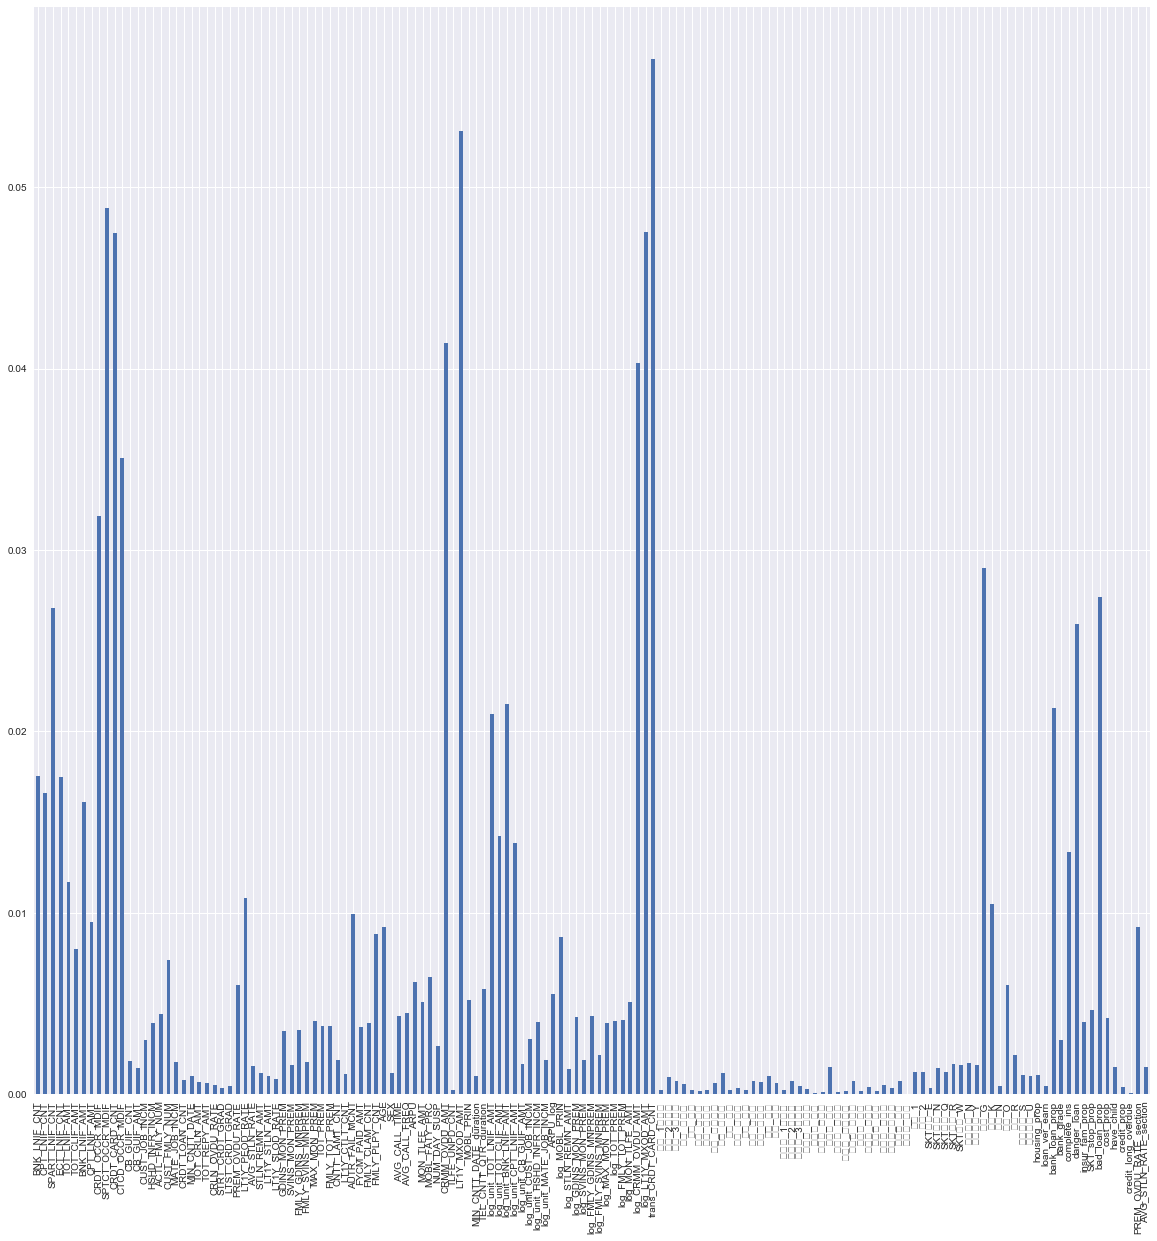

In [65]:
# 중요한 변수
importances = random_model_total.feature_importances_
plt.figure(figsize=(20,20))
pd.Series(importances, index=pd.DataFrame(X).columns). plot(kind='bar')
plt.show()

# 5. Transfer Testset

In [70]:
raw_data = pd.read_csv('Test_set.csv',encoding='cp949')
print ("Data Shape : {}".format(raw_data.shape))
copy_data = raw_data[:]

# OCCP_NAME_G
check_data = raw_data[['OCCP_NAME_G', 'CUST_JOB_INCM',\
                       'CRLN_OVDU_RATE', 'AGE']]
check_data['OCCP_NAME_G'].fillna('비식별', inplace=True)
check_data['OCCP_NAME_G'].replace({'*':'비식별'}, inplace=True)
copy_data['OCCP_NAME_G'] = check_data['OCCP_NAME_G']

# LAST_CHLD_AGE
copy_data['LAST_CHLD_AGE'].fillna(0, inplace=True)

#  MATE_OCCP_NAME_G

check_data = copy_data[['MATE_OCCP_NAME_G', 'MATE_JOB_INCM',\
                        'ACTL_FMLY_NUM','AGE']]
check_data['MATE_OCCP_NAME_G'].fillna('미혼', inplace=True)
check_data['MATE_OCCP_NAME_G'].replace({'*':'비식별'}, inplace=True)

copy_data['MATE_OCCP_NAME_G'] = check_data['MATE_OCCP_NAME_G']

# TEL_MBSP_GRAD
copy_data['TEL_MBSP_GRAD'].fillna('N', inplace=True)

# PAYM_METD
copy_data['PAYM_METD'].fillna('N', inplace=True)

# Age

# *을 제외한 나이의 평균인 46으로 채움
copy_data['AGE'].replace({'*':46}, inplace=True)

# Sex
check_data = copy_data[['SEX', 'OCCP_NAME_G', 'MATE_OCCP_NAME_G',\
                        'CUST_JOB_INCM']]

check_list1 = check_data['SEX'].tolist()
check_list2 = check_data['CUST_JOB_INCM'].tolist()
check_list3 = check_data['MATE_OCCP_NAME_G'].tolist()

for i, val in enumerate(check_list1): # 인덱스와 값을 가져옴
    if val == '*':
        if check_list2[i]>3600:
            check_list1[i] = '1'
        elif check_list3[i] =='주부':
            check_list1[i] = '1'
        else:
            check_list1[i] = '2'
            
        
check_data['SEX'] = check_list1
copy_data['SEX'] = check_data['SEX']

Data Shape : (2019, 69)


/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [71]:
cur = 24214

# MIN_CNTT_DATE
check_data = copy_data [['MIN_CNTT_DATE', 'CTCD_OCCR_MDIF', \
                         'CRDT_OCCR_MDIF','SPTCT_OCCR_MDIF' ]]

check_data['MIN_CNTT_DATE']=pd.DataFrame(((check_data['MIN_CNTT_DATE'\
                                                     ].values/100).astype(int)) * 12 + \
                                         (check_data['MIN_CNTT_DATE'].values%100))
check_data_list = check_data['MIN_CNTT_DATE'].tolist()

for i,val in enumerate(check_data_list):
    if val != 0:
        check_data_list[i] = cur-val
        
check_data.loc[:,'MIN_CNTT_DATE']= pd.DataFrame(check_data_list)

copy_data['MIN_CNTT_DATE_duration'] = check_data['MIN_CNTT_DATE']

# TEL_CNTT_QTR

check_data = pd.DataFrame(copy_data['TEL_CNTT_QTR'])

#데이터의 연월을 변환
check_data['TEL_CNTT_QTR']=pd.DataFrame(((check_data[\
                                                     'TEL_CNTT_QTR'].values/10).astype(int)) \
                                        * 12 + ((check_data['TEL_CNTT_QTR'].values%10)*3))

check_data_list = check_data['TEL_CNTT_QTR'].tolist()
for i,val in enumerate(check_data_list):
    if val != 0:
        check_data_list[i] = cur-val
        
check_data.loc[:,'TEL_CNTT_QTR']= pd.DataFrame(check_data_list)
copy_data['TEL_CNTT_QTR_duration'] = check_data['TEL_CNTT_QTR']


#  LT1Y_PEOD_RATE
check_data = copy_data['LT1Y_PEOD_RATE'].tolist()

for i, val in enumerate(check_data):
    if val != 0:
        check_data[i] = int(check_data[i][:2])
temp = pd.DataFrame(check_data) 
temp.rename(columns={0:'LT1Y_PEOD_RATE'}, inplace=True)

copy_data['LT1Y_PEOD_RATE'] = temp

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [72]:
#천원 -> 원
loan_feature_1 = ['TOT_LNIF_AMT','TOT_CLIF_AMT','BNK_LNIF_AMT',\
                  'CPT_LNIF_AMT', 'CB_GUIF_AMT']
check_data = copy_data[loan_feature_1]
loan_feature_1_unit = ["unit_{}".format(i) for i in loan_feature_1 ] 


for i,j in zip(loan_feature_1, loan_feature_1_unit):
    #check_data = check_data.assign(j = lambda x: (x[i])*1000)
    if check_data[i].bool != False:
        newcol = (check_data[i])*1000
        check_data[j] = newcol
    
    
#로그변환

loan_feature_1_unit_log = ["log_{}".format(i) for i in loan_feature_1_unit ] 

# 기존의 데이터에 log 를 취한 column생성


    
for i in loan_feature_1_unit:
    v = 'log_'+i
    check_data[v] = np.log(check_data[i]+1)
    
    
#로그변환 취한 데이터를 copy_data에 적용
copy_data[loan_feature_1_unit_log] = check_data[loan_feature_1_unit_log]


#단위 변경 데이터를 적용한다
copy_data[loan_feature_1] = check_data[loan_feature_1_unit]

# =======================================

# 만원 -> 원

loan_feature_2 = ['CUST_JOB_INCM', 'HSHD_INFR_INCM','MATE_JOB_INCM']
check_data = copy_data[loan_feature_2]
loan_feature_2_unit = ["unit_{}".format(i) for i in loan_feature_2 ] 


for i,j in zip(loan_feature_2, loan_feature_2_unit):
    check_data[j]= list(map(lambda x: x*10000 , check_data[i]))

#로그변환

loan_feature_2_unit_log = ["log_{}".format(i) for i in loan_feature_2_unit ] 

# 기존의 데이터에 log 를 취한 column생성


    
for i in loan_feature_2_unit:
    v = 'log_'+i
    check_data[v] = np.log(check_data[i]+1)
    
#로그변환 취한 데이터를 copy_data에 적용
copy_data[loan_feature_2_unit_log] = check_data[loan_feature_2_unit_log]
copy_data[loan_feature_2] = check_data[loan_feature_2_unit]


# 로그변환 =============================
raw_feature = ['MOBL_PRIN', 'STLN_REMN_AMT','GDINS_MON_PREM', \
               'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM','FMLY_SVINS_MNPREM',\
               'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM',\
                'MON_TLFE_AMT','CRMM_OVDU_AMT',\
               'LT1Y_MXOD_AMT']

check_data = copy_data[raw_feature]


raw_feature_log = ["log_{}".format(i) for i in raw_feature]


for i in raw_feature:
    v = 'log_'+i
    check_data[v] = np.log(check_data[i]+1)

copy_data['ARPU_log'] = np.log(copy_data['ARPU']+2)


copy_data[raw_feature_log] = check_data[raw_feature_log]


#============
#count 변수

import math 

copy_data['trans_CRDT_CARD_CNT'] = list(map(lambda x : \
                                            math.sqrt(x), \
                                            copy_data['CRDT_CARD_CNT']))


/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [73]:
# OCCP_NAME_G

cat_feature = ['OCCP_NAME_G', 'MATE_OCCP_NAME_G', 'SEX',\
               'TEL_MBSP_GRAD', 'CBPT_MBSP_YN', 'PAYM_METD',\
                'LINE_STUS']
check_data = raw_data[cat_feature]

check_data['OCCP_NAME_G'] = list(map(lambda x: x.replace(" ",""), check_data['OCCP_NAME_G']))

#표기의 간편성을 위해 변수 이름을 바꾼다

check_data['OCCP_NAME_G'].replace({'2차산업종사자': '2차산업', \
                                  '3차산업종사자': '3차산업',\
                                  '단순사무직': '사무보조',\
                                  '고소득전문직':'전문직',\
                                  '1차산업종사자':'1차산업',\
                                  '기업/단체임원':'임원',\
                                  '예체능계종사자':'예술',\
                                  '단순노무직':'노무직'}, inplace=True)

#get_dummies적용

copy_data =pd.concat([copy_data, pd.get_dummies(check_data['OCCP_NAME_G'], prefix='직업')], axis=1)



# MATE_OCCP_NAME_G

check_data['MATE_OCCP_NAME_G'] = list(map(lambda x: x.replace(" ",""), check_data['MATE_OCCP_NAME_G']))
check_data['MATE_OCCP_NAME_G'].replace({'2차산업종사자':'2차산업',\
                                       '3차산업종사자':'3차산업',\
                                       '1차산업종사자':'1차산업',\
                                       '단순사무직':'사무보조',\
                                       '기업/단체임원':'임원',\
                                       '고소득전문직':'전문직',\
                                       '단순노무직':'노무직',\
                                       '예체능계종사자':'예술'},inplace=True)

copy_data = pd.concat([copy_data,pd.get_dummies(check_data['MATE_OCCP_NAME_G'], prefix='배우자')], axis=1)


# SEX
temp = pd.get_dummies(check_data['SEX'], prefix="성별")
copy_data = pd.concat([copy_data, temp], axis=1)


# 통신관련 변수

phone_feature = [ 'TEL_MBSP_GRAD','CBPT_MBSP_YN',\
                 'PAYM_METD','LINE_STUS']

temp = pd.get_dummies(check_data[phone_feature], prefix=['SKT등급','결합상품','납부',\
                                                         '회선상태'])
copy_data = pd.concat([copy_data, temp], axis=1)


# 더미화 후 카테고리 변수 삭제

del_feature = ['OCCP_NAME_G', 'MATE_OCCP_NAME_G', \
               'TEL_MBSP_GRAD', 'CBPT_MBSP_YN', 'TEL_CNTT_QTR', \
               'LINE_STUS','PAYM_METD']

copy_data.drop(del_feature, axis=1, inplace=True)

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [75]:
# 두 변수의 비율로 새로운 변수를 생성하는 함수

def make_var(feature1, feature2, var_name):# 1:분모 / 2:분자
    temp=[feature1, feature2]
    check_data = copy_data[temp]+1 # 0인 값이 많기 때문에 1을 더한다
    copy_data[var_name] = check_data[feature2]/check_data[feature1]
    
    # 담보대출 비율
make_var('TOT_LNIF_AMT', 'CB_GUIF_AMT', 'housing_prop')

# 소득대비 대출 금액
make_var('HSHD_INFR_INCM', 'TOT_LNIF_AMT', 'loan_ver_earn')

# 은행권 대출 비율
make_var('TOT_LNIF_AMT', 'BNK_LNIF_AMT', 'bank_loan_prop')

# 은행권 내의 본인 등급
make_var('CUST_JOB_INCM', 'BNK_LNIF_AMT', 'bank_grade')

# 보험 유지 비율
make_var('FMLY_PLPY_CNT','CNTT_LAMT_CNT', 'complete_ins')

# 위헙 대출 비중
make_var('TOT_LNIF_AMT', 'CPT_LNIF_AMT', 'danger_loan')
         
         # 가구 재 보험가입 비중
make_var('ACTL_FMLY_NUM','CUST_FMLY_NUM','insur_fam_prop')
         
         
# 통신요금 정지 비중
copy_data['TEL_CNTT_QTR_duration_day']=copy_data['TEL_CNTT_QTR_duration']*30
make_var('TEL_CNTT_QTR_duration_day', 'NUM_DAY_SUSP', 'SKT_stop_prop')
copy_data.drop('TEL_CNTT_QTR_duration_day',axis=1, inplace=True)

         
         
# 은행권 대출 개수 대비 기타 대출 비중
bad_loan=['CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT']


copy_data['bad_loan'] = copy_data[bad_loan[0]]+ copy_data[bad_loan[1]]+copy_data[bad_loan[2]]
make_var('BNK_LNIF_CNT', 'bad_loan', 'bad_loan_prop')
copy_data.drop('bad_loan', axis=1, inplace=True)
         
         
         
         
# 월소득 대비 통신비, 보험료
cost_prop = ['FMLY_GDINS_MNPREM','FMLY_SVINS_MNPREM','MON_TLFE_AMT', 'HSHD_INFR_INCM']

check_data =  copy_data[cost_prop]
check_list = check_data['HSHD_INFR_INCM'].tolist()
check_mean = check_data['HSHD_INFR_INCM'].mean()
for i,val in enumerate(check_list): # 추정소득이 없는 가정은 평균값으로 임시 계산함
    if val == 0:
        check_list[i] = check_mean

check_data['HSHD_INFR_INCM'] = check_list

check_data['cost_prop'] =(check_data[cost_prop[0]]+check_data[cost_prop[1]]+ check_data[cost_prop[2]])/(check_data[cost_prop[3]]+1)
         
         

copy_data['cost_prop'] = check_data['cost_prop']
         
         
         
# 자녀의 유무
child =[]
for i in np.array(copy_data['LAST_CHLD_AGE']):
    if i == 0:
        child.append(0)
    else:
        child.append(1)
        
copy_data['have_child'] = child

copy_data.drop('LAST_CHLD_AGE', axis=1, inplace=True)
         
         
# 소득대비 신용대출의 비중
make_var('HSHD_INFR_INCM', 'TOT_CLIF_AMT', 'credit_prop')

         
         
# 한화 생명 신용대출 연체
check_data = raw_data[['TOT_CRLN_AMT','TOT_REPY_AMT','CRLN_OVDU_RATE']]


check_data_list = check_data['CRLN_OVDU_RATE'].tolist()

for i, val in enumerate(check_data_list):
    if val != 0 :
        check_data_list[i] = 1

        
check_data['CRLN_OVDU_RATE'] = pd.DataFrame(check_data_list)

copy_data['CRLN_OVDU_RATE'] = check_data['CRLN_OVDU_RATE']

         
         
# 연체 상환 점수 변수
check_data = copy_data[['LT1Y_CLOD_RATE','CRLN_30OVDU_RATE']]

check_data_list = np.array(check_data)

check_result = []

for i in range(len(check_data_list)):
    if check_data_list[i][0] != 0 and check_data_list[i][1] != 0:
        check_result.append(1)
    else:
        check_result.append(0)
    
copy_data['credit_long_overdue'] = pd.DataFrame(check_result)
copy_data.drop(['LT1Y_CLOD_RATE','CRLN_30OVDU_RATE'], axis=1, inplace=True)

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [76]:
# 값을 구간별로 나누는 함수
def make_section(feature1):
    check_data_list = copy_data[feature1].tolist()
    for i, val in enumerate(check_data_list):
        if val == 0:
            check_data_list[i] = 0
        elif int(val/10) ==0:
            check_data_list[i] = 1
        else: 
            check_data_list[i] = int(val/10)
            
    return check_data_list        
            
    
# PREM_OVDU_RATE

check_data =np.log(copy_data['PREM_OVDU_RATE']+1)


check_data_list = make_section('PREM_OVDU_RATE')
copy_data['PREM_OVDU_RATE_section'] = pd.DataFrame(check_data_list)

#AVG_STLN_RATE
check_data_list = make_section('AVG_STLN_RATE')

copy_data['AVG_STLN_RATE_section'] = pd.DataFrame(check_data_list)

print(copy_data.shape)
raw_data = copy_data[:]

(2019, 147)


In [77]:
# 스케일링

X = raw_data.drop(['CUST_ID','TARGET'], axis = 1)
test_ID = raw_data['CUST_ID']
y = raw_data['TARGET']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print (X_scaled.shape)

(2019, 145)


In [79]:
pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
0,0.2,0.2,0.142857,0.000000,0.093561,0.015092,0.082628,0.049837,0.107438,0.107438,0.454545,0.603306,0.0,0.0,0.56,0.575,0.714286,0.000000,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.000000,0.00,0.000000,0.00000,0.0,0.000000,0.0275,0.000000,0.011011,0.015737,0.008008,0.008,0.0,0.00,0.122807,0.000000,0.000000,0.000000,0.3,0.0,0.105128,0.171429,0.263162,0.071429,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.222222,0.828430,0.797578,0.879345,0.846384,0.0,0.968524,0.971048,0.956652,0.890169,0.000000,0.00000,0.000000,0.76361,0.000000,0.720244,0.736564,0.767047,0.767010,0.803918,0.000000,0.000000,0.674200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.064949e-13,1.044829e-09,8.387114e-01,1.823132e-09,0.192982,1.612993e-01,0.000000,0.000433,0.094203,0.013657,1.0,3.748365e-10,0.0,0.142857,0.0
1,0.2,0.0,0.000000,0.000000,0.018109,0.018110,0.019069,0.000000,0.107438,0.000000,0.363636,1.000000,0.0,0.0,0.65,0.595,0.428571,0.333333,0.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.000000,0.44,0.000000,0.39604,0.0,0.246231,0.0000,0.196787,0.000000,0.284692,0.099099,0.109,0.0,0.00,0.000000,0.069655,0.200000,0.500000,0.7,1.0,0.092308,0.167143,0.157899,0.057143,0.50,0.0,0.00,0.0,0.00,0.545455,0.0,0.200000,0.709504,0.806378,0.808392,0.000000,0.0,0.976614,0.972837,0.966549,0.848145,0.956427,0.00000,0.903370,0.00000,0.889622,0.000000,0.920283,0.888447,0.893047,0.787338,0.000000,0.000000,0.603023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.274946e-12,1.954300e-10,1.000000e+00,3.624844e-10,0.008041,5.454643e-08,0.440000,0.000484,0.021739,0.043719,1.0,4.346795e-10,0.0,0.142857,0.4
2,0.0,0.2,0.142857,0.000000,0.006036,0.006037,0.000000,0.019937,0.008264,0.008264,0.181818,0.008264,0.0,0.0,0.00,0.135,0.285714,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.111111,0.70,0.045455,0.00000,0.1,0.035176,0.0000,0.028112,0.000000,0.010014,0.010010,0.010,0.0,0.00,0.175439,0.002759,0.021429,0.045455,0.1,0.0,0.255128,0.220000,0.263162,0.071429,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.011111,0.629952,0.753355,0.000000,0.799454,0.0,0.000000,0.895234,0.000000,0.890169,0.000000,0.82437,0.769204,0.00000,0.757497,0.000000,0.707885,0.777815,0.777778,0.803918,0.000000,0.000000,0.426401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.907981e-12,2.871487e-10,1.656328e-07,1.308899e-09,0.092105,1.000000e+00,0.300000,0.002201,0.202899,0.043628,0.0,6.386743e-10,0.0,0.142857,0.7
3,0.0,0.0,0.142857,0.166667,0.009054,0.009055,0.000000,0.000000,0.404959,0.404959,0.000000,0.000000,0.0,0.0,0.00,0.520,0.285714,0.333333,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00000,0.0,0.030151,0.0000,0.024096,0.010010,0.008584,0.003003,0.020,0.0,0.00,0.035088,0.002069,0.028571,0.045455,0.8,1.0,0.131538,0.351429,0.263162,0.114286,0.00,0.0,0.08,0.0,0.17,0.227273,0.0,0.066667,0.659311,0.772923,0.000000,0.000000,0.0,0.000000,0.965788,0.000000,0.890169,0.893493,0.00000,0.758576,0.00000,0.747031,0.714331,0.698104,0.719715,0.811226,0.838839,0.817183,0.871742,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [80]:
X_test_bef_clu = pd.DataFrame(X_scaled)
X_test_bef_clu.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
0,0.2,0.2,0.142857,0.000000,0.093561,0.015092,0.082628,0.049837,0.107438,0.107438,0.454545,0.603306,0.0,0.0,0.56,0.575,0.714286,0.000000,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.000000,0.00,0.000000,0.00000,0.0,0.000000,0.0275,0.000000,0.011011,0.015737,0.008008,0.008,0.0,0.00,0.122807,0.000000,0.000000,0.000000,0.3,0.0,0.105128,0.171429,0.263162,0.071429,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.222222,0.828430,0.797578,0.879345,0.846384,0.0,0.968524,0.971048,0.956652,0.890169,0.000000,0.00000,0.000000,0.76361,0.000000,0.720244,0.736564,0.767047,0.767010,0.803918,0.000000,0.000000,0.674200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.064949e-13,1.044829e-09,8.387114e-01,1.823132e-09,0.192982,1.612993e-01,0.000000,0.000433,0.094203,0.013657,1.0,3.748365e-10,0.0,0.142857,0.0
1,0.2,0.0,0.000000,0.000000,0.018109,0.018110,0.019069,0.000000,0.107438,0.000000,0.363636,1.000000,0.0,0.0,0.65,0.595,0.428571,0.333333,0.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.000000,0.44,0.000000,0.39604,0.0,0.246231,0.0000,0.196787,0.000000,0.284692,0.099099,0.109,0.0,0.00,0.000000,0.069655,0.200000,0.500000,0.7,1.0,0.092308,0.167143,0.157899,0.057143,0.50,0.0,0.00,0.0,0.00,0.545455,0.0,0.200000,0.709504,0.806378,0.808392,0.000000,0.0,0.976614,0.972837,0.966549,0.848145,0.956427,0.00000,0.903370,0.00000,0.889622,0.000000,0.920283,0.888447,0.893047,0.787338,0.000000,0.000000,0.603023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.274946e-12,1.954300e-10,1.000000e+00,3.624844e-10,0.008041,5.454643e-08,0.440000,0.000484,0.021739,0.043719,1.0,4.346795e-10,0.0,0.142857,0.4
2,0.0,0.2,0.142857,0.000000,0.006036,0.006037,0.000000,0.019937,0.008264,0.008264,0.181818,0.008264,0.0,0.0,0.00,0.135,0.285714,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.111111,0.70,0.045455,0.00000,0.1,0.035176,0.0000,0.028112,0.000000,0.010014,0.010010,0.010,0.0,0.00,0.175439,0.002759,0.021429,0.045455,0.1,0.0,0.255128,0.220000,0.263162,0.071429,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.011111,0.629952,0.753355,0.000000,0.799454,0.0,0.000000,0.895234,0.000000,0.890169,0.000000,0.82437,0.769204,0.00000,0.757497,0.000000,0.707885,0.777815,0.777778,0.803918,0.000000,0.000000,0.426401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.907981e-12,2.871487e-10,1.656328e-07,1.308899e-09,0.092105,1.000000e+00,0.300000,0.002201,0.202899,0.043628,0.0,6.386743e-10,0.0,0.142857,0.7
3,0.0,0.0,0.142857,0.166667,0.009054,0.009055,0.000000,0.000000,0.404959,0.404959,0.000000,0.000000,0.0,0.0,0.00,0.520,0.285714,0.333333,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00000,0.0,0.030151,0.0000,0.024096,0.010010,0.008584,0.003003,0.020,0.0,0.00,0.035088,0.002069,0.028571,0.045455,0.8,1.0,0.131538,0.351429,0.263162,0.114286,0.00,0.0,0.08,0.0,0.17,0.227273,0.0,0.066667,0.659311,0.772923,0.000000,0.000000,0.0,0.000000,0.965788,0.000000,0.890169,0.893493,0.00000,0.758576,0.00000,0.747031,0.714331,0.698104,0.719715,0.811226,0.838839,0.817183,0.871742,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### (1) Fit Model

In [81]:
pred = random_model_total.predict(X_test_bef_clu)

In [82]:
y_test = pd.DataFrame(pred).rename(columns={0:'TARGET'})
y_test.head()

,TARGET
0,0
1,0
2,0
3,1
4,0


In [83]:
# 예측 label의 상환/부채의 비율
check_prop(y_test)

 1) 전체 데이터 개수 : 2019 
 2) 상환 개수 : 1957 
 3) 부실 개수: 62 
 4) 부실데이터 비율: 0.03 


### (3) Answer sheet

In [85]:

answer_sheet = pd.read_excel("Answer_sheet.xlsx")

In [86]:
answer_sheet['TARGET'] = y_test

In [87]:
answer_sheet.tail()

,CUST_ID,TARGET
2014,102009,0
2015,102154,1
2016,102163,0
2017,102189,0
2018,102204,1


In [88]:
answer_sheet.to_csv("answer_sheet_SohyunJeon.csv")